<a href="https://colab.research.google.com/github/ashugk/365datadcience/blob/main/CarEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data.

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


--2023-09-23 14:30:56--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.08s   

2023-09-23 14:30:56 (17.8 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [21]:
df= pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


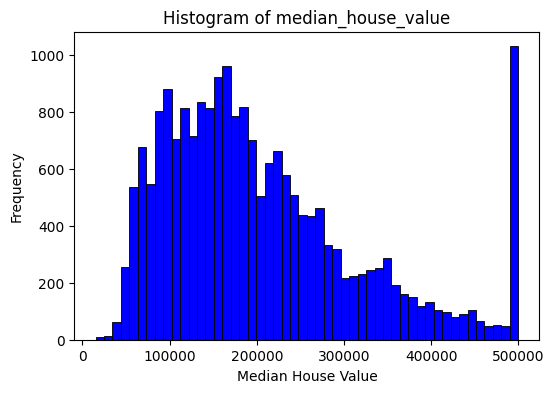

In [26]:
#sns.histplot(data.median_house_value, bin=50)
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=50, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Median House Value')
plt.title('Histogram of median_house_value')

plt.show()

Ans: No graph as no long tail

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [31]:
data_set= df[(df['ocean_proximity']== 'INLAND') | (df['ocean_proximity']=='<1H OCEAN')]
data_set['ocean_proximity'].unique()

array([], dtype=object)

Next, use only the following columns:

    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'


In [32]:
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]
# Create a new dataset with only the selected columns
new_df = df[selected_columns]

# Display the first few rows of the new dataset
print(new_df.head())

   latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
0     37.88    -122.23                41.0        880.0           129.0   
1     37.86    -122.22                21.0       7099.0          1106.0   
2     37.85    -122.24                52.0       1467.0           190.0   
3     37.85    -122.25                52.0       1274.0           235.0   
4     37.85    -122.25                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  


Question 1

There's one feature with missing values. What is it?

    total_rooms
    total_bedrooms
    population
    households


In [34]:
new_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [35]:
#Ans total_bedrooms

Question 2

What's the median (50% percentile) for variable 'population'?

    995
    1095
    1195
    1295


In [37]:
# Calculate the median for the 'population' variable
population_median = new_df['population'].median()

# Print the median value
print("Median population:", population_median)

Median population: 1166.0


In [40]:
new_df.describe()
#Ans : 1195

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h1>Prepare and split the dataset</h1>
Shuffle the dataset (the filtered one you created above), use seed 42

In [42]:
np.random.seed(42)

n = len(new_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = new_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [44]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']